<a href="https://colab.research.google.com/github/januarf12/GEOCING/blob/main/PCA2RASTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import gdal
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
fn = '/GEOCING/2021/AVR CAUCA/Susc_6_v1_Nube/La_Vega/Entradas/'

Mounted at /content/drive


In [ ]:
rasternames = ["X4R","X5R",
               "X6R","X8R","X10R",
               "X11R"]

In [ ]:
v1 = gdal.Open(fn +rasternames[-1]+".tif")
col   = v1.RasterXSize
rows  = v1.RasterYSize
nelem = col*rows


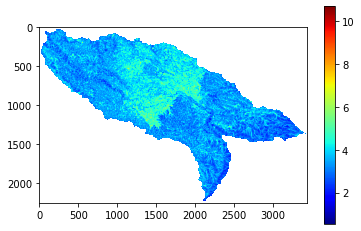

In [ ]:
#Ejectutar solo para comprobar
v1val = v1.GetRasterBand(1).ReadAsArray().flatten()
NanValues = np.where(v1val == -99999)[0]
v1val[NanValues]=None


plt.imshow(v1val.reshape(rows,col),cmap='jet')
plt.colorbar()

In [ ]:
#PASO 1: CARGAR RASTER
v1 = gdal.Open(fn + rasternames[0]+".tif")
v2 = gdal.Open(fn + rasternames[1]+".tif")
v3 = gdal.Open(fn + rasternames[2]+".tif")
v4 = gdal.Open(fn + rasternames[3]+".tif")
v5 = gdal.Open(fn + rasternames[4]+".tif")
v6 = gdal.Open(fn + rasternames[5]+".tif")
v7 = gdal.Open(fn + rasternames[6]+".tif")
v8 = gdal.Open(fn + rasternames[7]+".tif")

In [ ]:
#PASO 2: EXTRAER LOS VALORES
v1val = v1.GetRasterBand(1).ReadAsArray().flatten()
v2val = v2.GetRasterBand(1).ReadAsArray().flatten()
v3val = v3.GetRasterBand(1).ReadAsArray().flatten()
v4val = v4.GetRasterBand(1).ReadAsArray().flatten()
v5val = v5.GetRasterBand(1).ReadAsArray().flatten()
v6val = v6.GetRasterBand(1).ReadAsArray().flatten()
v7val = v7.GetRasterBand(1).ReadAsArray().flatten()
v8val = v8.GetRasterBand(1).ReadAsArray().flatten()

In [ ]:
#PASO 3: ENCONTRAR LAS POSICIONES Nan Y ELIMINARLAS

NanValues = np.where(v1val == -99999)[0]
DATA = np.stack((v1val,v2val,v3val,v4val,v5val,v6val,v7val,v8val),axis=1)

cP        = np.arange(0,nelem)
cPP       = np.delete(cP, NanValues, axis=0)

XX = np.delete(DATA, NanValues, axis=0)

In [ ]:
# Standardizing the features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(XX)

pca = PCA(n_components=2)
PC12 = pca.fit_transform(x)
print("The explained variance por 1 PC is: ", np.sum(pca.explained_variance_ratio_))

The explained variance por 1 PC is:  0.6517205097089228


In [ ]:
#################################################
# Write PCA data in the raster file
#################################################

driver = v1.GetDriver()

## PC1
pca1 = driver.Create(fn + "PC1" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca1.SetGeoTransform(v1.GetGeoTransform())
pca1.SetProjection(v1.GetProjection())

pca1dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca1dataarray[cPP[i]]=PC12[i,0]
    
for i in range(NanValues.shape[0]):
    pca1dataarray[NanValues[i]]=-99999

pca1.GetRasterBand(1).WriteArray(pca1dataarray.reshape(rows,col))
pca1.GetRasterBand(1).SetNoDataValue(-99999)
pca1 = None
del pca1


In [ ]:
## PC2
pca2 = driver.Create(fn + "PC2" + ".tif", col, rows, 1, gdal.GDT_Float32)
# Write metadata
pca2.SetGeoTransform(v1.GetGeoTransform())
pca2.SetProjection(v1.GetProjection())

pca2dataarray = np.zeros((rows,col)).flatten()

for i in range(cPP.shape[0]):
    pca2dataarray[cPP[i]]=PC12[i,1]
    
for i in range(NanValues.shape[0]):
    pca2dataarray[NanValues[i]]=-99999

pca2.GetRasterBand(1).WriteArray(pca2dataarray.reshape(rows,col))
pca2.GetRasterBand(1).SetNoDataValue(-99999)
pca2 = None
del pca2

In [ ]:
np.exp(1)

2.718281828459045